In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense,LSTM, SimpleRNN

In [2]:
#time step만큼 시퀀스 데이터 분리
def split_sequence(sequence,step):
    x,y = list(),list()

    for i in range(len(sequence)):
        end_idx = i +step
        if end_idx >len(sequence) -1:
            break

        seq_x,seq_y = sequence[i:end_idx],sequence[end_idx]
        x.append(seq_x)
        y.append(seq_y)

    return np.array(x),np.array(y)


In [9]:
#sin함수 학습 데이터
x=[i for i in np.arange(start =-10, stop =10, step=0.1)]
train_y = [np.sin(i) for i in x]

#hyperparameter
n_timesteps =15
n_features=1

# 시퀀스 나누기
# train_x.shape => (samples, timesteps)
# train_y.shape => (samples)
train_x,train_y=split_sequence(train_y, step=n_timesteps)
print("shape x:{} / y:{}".format(train_x.shape,train_y.shape))

shape x:(185, 15) / y:(185,)


In [11]:
#케라스에서 RNN 계층사용하려면 3차원 텐서 형태여야 함.
#현 2차(samples, time step)-> 3차(batch_size,time step,input length)

train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print("train_x.shape = {}".format(train_x.shape))
print("train_y.shape = {}".format(train_y.shape))

train_x.shape = (185, 15, 1)
train_y.shape = (185,)


In [13]:
# RNN 모델 정의
model = Sequential()
model.add(SimpleRNN(units=10, return_sequences=False, input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [14]:
#모델 학습
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    mode='auto')
history = model.fit(train_x,train_y,epochs =1000, callbacks=[early_stopping])


Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1587
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0459 
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0225 
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0245 
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0238 
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186 
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154 
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0151 
Epoch 9/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145 
Epoch 10/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0136 
Epoch 11/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0117 
Epoch 12/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112 
Epoch 13/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108 
Epoch 14/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0101 
Epoch 15/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091 
Epoch

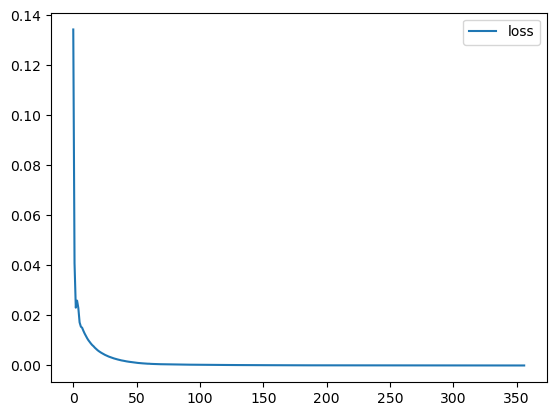

In [15]:
#loss 그래프 생성 
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

In [16]:
# 테스트용 데이터셋 생성
test_x= np.arange(10,20,0.1)
calc_y =np.cos(test_x)

In [19]:
#학습된 RNN 모델의 예측값을 그래프로 그리기 위해 test_y 리스트에 순차적으로 저장
test_y=calc_y[:n_timesteps]
for i in range(len(test_x)-n_timesteps):
    net_input = test_y[i : i+n_timesteps]
    net_input = net_input.reshape((1,n_timesteps, n_features))
    train_y = model.predict(net_input,verbose=0)
    predict_y= model.predict(net_input)
    test_y=np.append(test_y,predict_y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

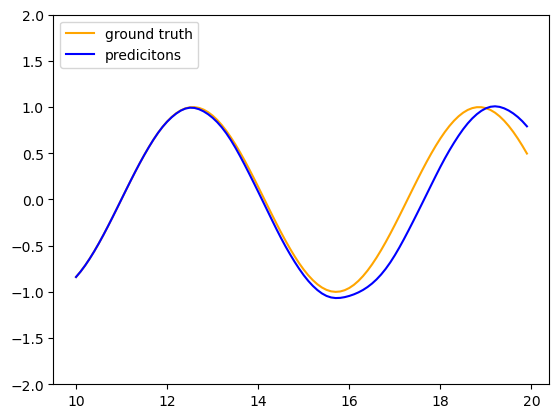

In [20]:
# 예측 결과 그래프 그리기
plt.plot(test_x, calc_y, label="ground truth", color="orange")
plt.plot(test_x, test_y, label="predicitons", color="blue")
plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()